# APIs de Visualização em Python

Wilson Freitas

@aboutwilson

Grupy-SP — abr/2016

![Livros sobre visualização](livros.png)

![APIs de visualização em Python em 2010](em-2010.png)

# APIs de Visualização em Python em 2016

![APIs de visualização em Python](frameworks.png)

# Coisas que considero importantes em APIs de Visualização


## Simplicidade

- Simplicidade de uso é importante para investigação dos dados
    - Criar gráficos com legenda, em *grid*, com múltiplas facetas e sem burocracia
- Integração com algumas estatísticas e análises
    - Histograma
    - Heatmap
    - Suporte a análises multivariadas: regressão linear, correlação, modelos de kernel, ...
    
## Recursos

- Gráficos agradáveis — *Beleza é Fundamental*
- Suporte a diferentes paletas de cores
- Suporte a diversos formatos: PNG, SVG, JPEG, TIFF, *JavaScript?*

# Vamos criar um dataset de ações

Usar Quandl para obter séries temporais de ações.

In [1]:
import Quandl

Definir as ações

In [2]:
tickers = ["GOOG/BVMF_BOVA11.4",
           "YAHOO/SA_PETR3.6",
           "GOOG/BVMF_VALE5.4",
           'GOOG/BVMF_BBDC4.4',
           'GOOG/BVMF_BBAS3.4',
           'GOOG/BVMF_ITUB4.4']


Criar um *DataFrame* com os dados

In [3]:
series = Quandl.get(tickers, trim_start="2013-01-01", trim_end="2015-12-31")

Renomear as colunas

In [4]:
series.columns = ['BOVESPA', 'PETROBRAS', 'VALE', 'BRADESCO', 'BB', 'ITAU']

Limpar os dados

In [5]:
series.dropna(inplace=True)

# Vincent

In [6]:
%matplotlib inline
import vincent as v
v.core.initialize_notebook()
import numpy as np
import pandas as pd

## Visualizando as séries temporais

In [7]:
line = v.Line(series)
line.axis_titles(x='Date', y='Price')
line.legend(title='Series')

## Séries temporais empilhadas

In [8]:
stacked = v.StackedArea(series)
stacked.axis_titles(x='Date', y='Price')
stacked.legend(title='Series')

## Mudando a paleta de cores

In [9]:
stacked = v.StackedArea(series)
stacked.axis_titles(x='Date', y='Price')
stacked.legend(title='Series')
stacked.colors(brew='Spectral')

## Comparando as séries de retornos acumulados

In [10]:
logreturns = np.log(series).diff().dropna(inplace=False)
factor = np.exp(logreturns)
factor.loc[pd.datetime(2013,1,3)] = 1
cumreturns = np.cumprod(factor)

line = v.Line(cumreturns)
line.axis_titles(x='Date', y='')
line.legend(title='Series')

# Seaborn

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_context('talk')

# Observando distribuições

Vamos transformar as séries de preços em séries de retornos.

$$
r_t = log\left( \frac{P_t}{P_{t-1}} \right)
$$

In [12]:
logreturns = np.log(series).diff().dropna()
logreturns.head()

,BOVESPA,PETROBRAS,VALE,BRADESCO,BB,ITAU
Date,,,,,,
2013-01-03,0.010553,0.036620,-0.012044,0.056659,0.019575,0.029285
2013-01-04,-0.009737,0.003395,-0.022100,-0.017784,-0.011853,-0.009036
2013-01-07,-0.009339,-0.013162,-0.020118,-0.004174,0.005753,-0.014093
2013-01-08,-0.013924,-0.028872,-0.006215,0.003212,0.011407,0.004211
2013-01-09,0.005659,0.010051,0.004975,0.012747,0.009407,0.015915


# Analisando boxplots dos retornos

Para analisar os retornos de forma categórica é necessário tirar um `melt` dos retornos.

In [13]:
logreturns_m = pd.melt(logreturns)
logreturns_m.head()

,variable,value
0,BOVESPA,0.010553
1,BOVESPA,-0.009737
2,BOVESPA,-0.009339
3,BOVESPA,-0.013924
4,BOVESPA,0.005659


# boxplots dos retornos

Note que os boxplots são agregados por ação.

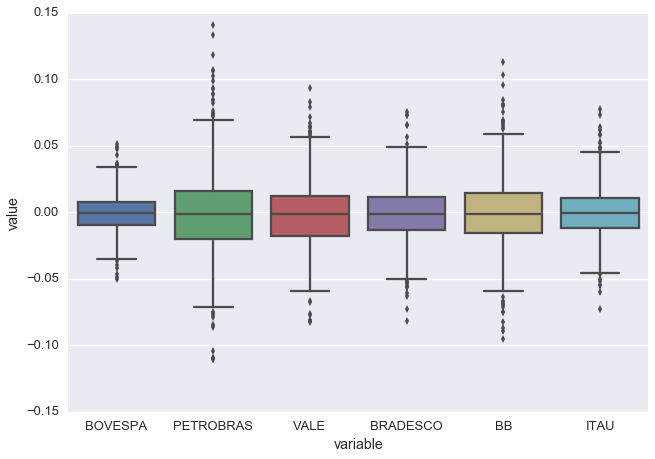

In [14]:
sb.boxplot(logreturns_m['variable'], logreturns_m['value']);

# Violinos ao invés de boxplots

Buscando formas diferentes de visualização.

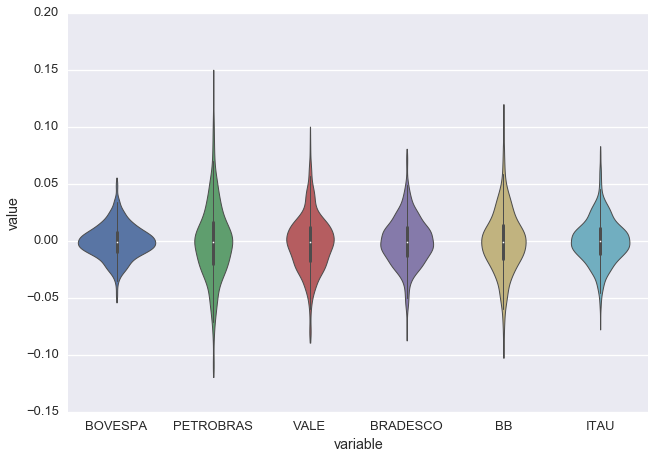

In [15]:
sb.violinplot(logreturns_m['variable'], logreturns_m['value'], linewidth=1, cut=1);

# Buscando relacionamentos entre as variáveis

/Users/wilson/dev/grupy-abril-2016/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


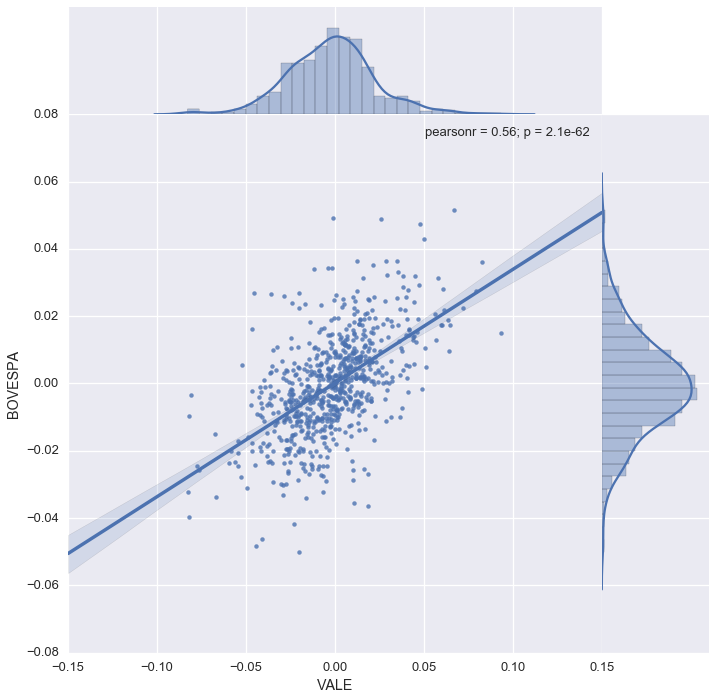

In [16]:
sb.jointplot("VALE", "BOVESPA", logreturns, kind="reg", space=0, size=10);

# Correlação entre as vairáveis

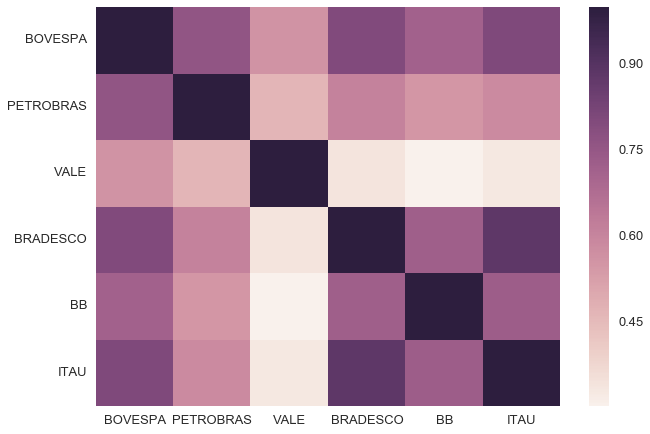

In [17]:
corr = logreturns.corr()
sb.heatmap(corr);

# Fim

Wilson Freitas

@aboutwilson

http://wilsonfreitas.github.io